# Overview
This project aims to analyze aviation accident data from the National Transportation Safety Board (NTSB) to identify the safest aircraft and provide actionable insights that will guide the company’s acquisition strategy.
The analysis will focus on aviation accidents and incidents from 1962 to 2023, covering civil aviation in the United States. The investigation type taken into consideration is accidents. Key areas of investigation will include accident rates by aircraft type, common causes of accidents, and regional risk factors. The goal is to translate these findings into three concrete business recommendations that will help the head of the new aviation division make informed decisions on which aircraft to purchase.

# Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


#### Stakeholders
The main stakeholder of this project is the Head of the Aviation Division.

# Data
Two datasets were obtained for this project.
* A .csv file from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
* A .csv file with the United States names and their abbreviations
#### Data Sources
The data was obtained from Kaggle (https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

# Key Business Questions
* Which aircraft makes are associated with the fewest total injuries in recorded accidents?
* What are the most common causes of aviation accidents?
* Which regions  are associated with higher risks?

# Data Cleaning

# 1.0 Importing our Libraries

In [96]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# 1.1  Loading Data

In [97]:
# Reading our data from a csv into a dataframe
# First Dataframe
Aviation_data_df=pd.read_csv('AviationData.csv', encoding='ISO-8859-1')

# Second Dataframe
States_df=pd.read_csv('USState_Codes.csv', encoding='ISO-8859-1')


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [98]:
Aviation_data=Aviation_data_df.copy(deep=True)

# 1.2 Previewing our Data

#### Aviation_data_df

In [99]:
# Previewing the first 5 rows
Aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [100]:
# Previewing the last 5 rows
Aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# 1.3 Accessing information about our data

In [101]:
# Dataset information
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [102]:
# Summary Statistics of the data
Aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [103]:
# Shape of the  data
Aviation_data.shape

(88889, 31)

In [104]:
# Data types of the columns
Aviation_data.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

#### States_df

In [105]:
States_df

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [106]:
# Shape
States_df.shape

(62, 2)

In [107]:
# Summary statistics
States_df.describe()

,US_State,Abbreviation
count,62,62
unique,62,62
top,Virgin Islands,MI
freq,1,1


# 1.4 Data Cleaning
This step is crucial for ensuring data accuracy and consistency, making the dataset ready for analysis.


#### States_df

In [108]:
# Checking for duplicates
States_df.duplicated().sum()

0

In [109]:
# Checking for null values
States_df.isnull().sum()

US_State        0
Abbreviation    0
dtype: int64

### Checking for Duplicates

In [110]:
# Checking for duplicates in the dataframe
duplicates=Aviation_data.duplicated().sum() # This checks for the duplicates and sums them up
print(f'Number of Duplicated rows: {duplicates}')

Number of Duplicated rows: 0


In [111]:
# Dropping the duplicates
Aviation_data.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Checking for missing values

In [112]:
#Checking and summing the  missing values in the dataframe
Aviation_data.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

A few observation columns were dropped since they were not going to be used in the analysis;
* Latitude and Longitude
* Schedule
* Air carrier
* Airport Name
* Airport code
* Publication Date
* Report Status
* Broad phase of flight

In [113]:
# Dropping irrelevant observations
Aviation_data.drop(columns=['Latitude','Longitude', 'Schedule', 'Air.carrier', 'Airport.Name','Airport.Code',
                               'Publication.Date','Report.Status','Registration.Number','FAR.Description', 'Broad.phase.of.flight'],inplace=True)
#Checking the remaining columns
Aviation_data_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Cleaning the 'Event.Date' column.
* Converting the date values into datetime object for easier analysis
* Extracting the year

In [114]:
# Event Date Column
# Convert the values into date format
Aviation_data['Event.Date'] = pd.to_datetime(Aviation_data['Event.Date'])
Aviation_data['Event.Date']

0       1948-10-24
1       1962-07-19
2       1974-08-30
3       1977-06-19
4       1979-08-02
           ...    
88884   2022-12-26
88885   2022-12-26
88886   2022-12-26
88887   2022-12-26
88888   2022-12-29
Name: Event.Date, Length: 88889, dtype: datetime64[ns]

In [115]:
# Creating a 'Year' column
Aviation_data['Year']=Aviation_data['Event.Date'].dt.year # .dt.year extracts the year from the date
Aviation_data['Year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: Year, Length: 88889, dtype: int64

In [116]:
# Dropping the Event.Date column
Aviation_data.drop(columns=['Event.Date'], axis=1, inplace=True)

**Injury Severity column**
* Removing the extra characters i.e. (int). The numbers inside the parentheses are captured under 'Total.Fatal.Injuries' column

In [117]:
#Replacing the () and any value inside the parentheses with an empty string
Aviation_data['Injury.Severity']=Aviation_data['Injury.Severity'].str.replace(r'\(.*\)', '', regex=True).str.strip()
Aviation_data['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', nan, 'Minor',
       'Serious'], dtype=object)

**Location Column**
* Converting all values to uppercase letters for uniformity
* Splitting City and State

In [118]:
# Converting all the values to uppercase
Aviation_data['Location']= Aviation_data['Location'].str.upper()

# Split the City and State
# Splitting the value at comma, and accessing the string at index 0
Aviation_data['City'] = Aviation_data['Location'].str.split(',').str[0]

# Splitting the value at comma, and accessing the string at index 1
Aviation_data['State'] = Aviation_data['Location'].str.split(',').str[1]

# Removing characters at the start and end of the values
Aviation_data['State'] = Aviation_data['State'].str.strip()


**Make Column**
* Converting values to uppercase
* Stripping the values of any characters at the start and end
* Harmonizing the names to have less unique values

In [119]:
# Converting the values into upper case
Aviation_data['Make']=Aviation_data['Make'].str.upper()

# Removing any extra characters at the start and end of each value
Aviation_data['Make'] = Aviation_data['Make'].str.strip(',".')

# Creating function to extract the first word
def extract_first_word(value):
    if isinstance(value, str):  # Check if the value is a string
        return value.split()[0]  # Split and return the first word
    else:
        return value
    # Apply function to 'Make' column
Aviation_data['Make']=Aviation_data['Make'].apply(extract_first_word)
Aviation_data['Make'].unique() # Getting the unique values

array(['STINSON', 'PIPER', 'CESSNA', ..., 'RHINEHART', 'DETRICK', 'SEACE'],
      dtype=object)

**Aircraft Category**
* Harmonizing the data by renaming categories that appear to be the same


In [120]:
# Aircraft Category

Aviation_data['Aircraft.Category'].replace({'UNK':'Unknown', 'ULTR':'Ultralight', 'WSFT':'Weight-Shift'}, inplace=True)
Aviation_data['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket'], dtype=object)

**Weather Condition**
* Harmonizing values

In [121]:
Aviation_data['Weather.Condition'] = Aviation_data['Weather.Condition'].replace({'Unk':'Unknown','UNK':'Unknown','Personal':'Unknown'})
Aviation_data['Weather.Condition'].unique()

array(['Unknown', 'IMC', 'VMC', nan], dtype=object)

**Purpose of Flight**
* Harmonizing the value names


In [122]:
# 'Purpose of flight' column
Aviation_data['Purpose.of.flight'].replace({'Other Work Use':'Unknown', 'Aerial Application':'Aerial Observation',
                'Air Race/show':'Air Race show', 'Business':'Executive/corporate', 'PUBL':'Public', 'Public Aircraft - Local':'Public Aircraft',
                  'Public Aircraft - State':'Public Aircraft' , 'Public Aircraft - Federal':'Public Aircraft','External Load':'Ferry' , 'Banner Tow':'Glider Tow',
                          'Public':'Public Aircraft'}, inplace=True)
Aviation_data['Purpose.of.flight'].unique()

array(['Personal', nan, 'Executive/corporate', 'Instructional', 'Unknown',
       'Ferry', 'Aerial Observation', 'Public Aircraft', 'Skydiving',
       'Positioning', 'Flight Test', 'Air Race show', 'Air Drop',
       'Glider Tow', 'Firefighting', 'PUBS', 'ASHO', 'Public'],
      dtype=object)

**Engine Type**

In [123]:
# Engine Type
Aviation_data['Engine.Type']=Aviation_data_df['Engine.Type'].replace({'UNK':'Unknown', 'Geared Turbofan':'Turbo Fan'})
Aviation_data['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'LR', 'NONE'], dtype=object)

#### Cleaning the States_df

In [124]:
# Removing characters at the start and end of the values
States_df['Abbreviation'] = States_df['Abbreviation'].str.strip()

## Handling Missing Values

**Injury Severity Column**

In [125]:
# Fill the missing values with the most common severity
most_injury_severity= Aviation_data['Injury.Severity'].mode()[0] # Most common severity

Aviation_data.fillna({'Injury.Severity':most_injury_severity}, inplace=True)

Aviation_data['Injury.Severity'].value_counts() # Getting the count of the unique values

Non-Fatal      68357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

**Location Column**

In [126]:
# Filling the missing values
Aviation_data['Location'].fillna('Unknown',inplace=True)


**Make Column**

In [127]:
# Filling the missing values with unknown
Aviation_data['Make'].fillna('Unknown', inplace=True)


**Aircraft Category**

In [128]:
# Finding the most common category
most_common_cat=Aviation_data['Aircraft.Category'].mode()[0]

# Filling the missing values with the most common value
Aviation_data['Aircraft.Category'].fillna(most_common_cat, inplace=True)
Aviation_data['Aircraft.Category'].unique()


array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket'], dtype=object)

**Amateur Built**

In [129]:
# Getting the most common response
most_common_response= Aviation_data['Amateur.Built'].mode()[0]

# Filling the values with the most common response
Aviation_data.fillna({'Amateur.Built':most_common_response}, inplace=True)

**Weather Condition**

In [130]:
# Most common weather condition
most_common_weather=Aviation_data['Weather.Condition'].mode()[0]

# Filling the missing values with the most common
Aviation_data['Weather.Condition'].fillna(most_common_weather, inplace=True)


**Purpose of Flight**

In [131]:
# Filling the missing values with the most common purpose
common_purpose=Aviation_data['Purpose.of.flight'].mode()[0]

# Fill the missing values with the most common purpose
Aviation_data.fillna(common_purpose, inplace=True)


**Total Uninjured Column**

In [132]:
# Filling the NaN values with 0
Aviation_data['Total.Uninjured'].fillna(0, inplace=True)

**Total Fatal Injuries**

In [133]:
# Fill missing values based on Injury Severity
Aviation_data.loc[(Aviation_data['Injury.Severity'] == 'Fatal') &
(Aviation_data['Total.Fatal.Injuries'].isnull()),
    'Total.Fatal.Injuries'
] = 1
Aviation_data.loc[(Aviation_data['Injury.Severity'] == 'Non-Fatal') &
(Aviation_data['Total.Fatal.Injuries'].isnull()),
    'Total.Fatal.Injuries'
] = 0
Aviation_data.loc[(Aviation_data['Injury.Severity'] == 'Incident') &
(Aviation_data['Total.Fatal.Injuries'].isnull()),
    'Total.Fatal.Injuries'
] = 0
Aviation_data.loc[(Aviation_data['Injury.Severity'] == 'Minor') &
(Aviation_data['Total.Fatal.Injuries'].isnull()),
    'Total.Fatal.Injuries'
] = 1
Aviation_data.loc[(Aviation_data['Injury.Severity'] == 'Serious') &
(Aviation_data['Total.Fatal.Injuries'].isnull()),
    'Total.Fatal.Injuries'
] = 1
Aviation_data.loc[(Aviation_data['Injury.Severity'] == 'Unavailable') &
(Aviation_data['Total.Fatal.Injuries'].isnull()),
    'Total.Fatal.Injuries'
] = 0


**Total Serious Injuries Column**

In [134]:
# Filling the missing values with 0
Aviation_data['Total.Serious.Injuries'].fillna(0, inplace=True)

**Total Minor Injuries**

In [135]:
# Filling the missing values with 0
Aviation_data['Total.Minor.Injuries'].fillna(0,inplace=True)

#### Creating a Total Injuries Column
This contains an aggregation of Total Fatal,Serious and Minor injuries

In [136]:
# Convert the columns to float64
Aviation_data['Total.Minor.Injuries'] = pd.to_numeric(Aviation_data['Total.Minor.Injuries'], errors='coerce')
Aviation_data['Total.Fatal.Injuries'] = pd.to_numeric(Aviation_data['Total.Fatal.Injuries'], errors='coerce')
Aviation_data['Total.Serious.Injuries'] = pd.to_numeric(Aviation_data['Total.Serious.Injuries'], errors='coerce')

# Creating a new column with Total recorded injuries
Aviation_data['Total.Injuries']=(Aviation_data['Total.Fatal.Injuries']+Aviation_data['Total.Serious.Injuries']+
                                    Aviation_data['Total.Minor.Injuries'])

Aviation_data['Total.Injuries']

0        2.0
1        4.0
2        NaN
3        2.0
4        NaN
        ... 
88884    1.0
88885    0.0
88886    0.0
88887    0.0
88888    1.0
Name: Total.Injuries, Length: 88889, dtype: float64

Dropping the Total fatal,minor and serious injuries. The 'Total.Injuries' column will be used for analysis

In [137]:
# Dropping the Total fatal,minor and serious injuries
Aviation_data.drop(columns=['Total.Minor.Injuries','Total.Fatal.Injuries','Total.Serious.Injuries'], inplace=True)

In [138]:
# State column
Aviation_data['State'].dropna() # Drop null rows

0        ID
1        CA
2        VA
3        CA
4        OH
         ..
88884    MD
88885    NH
88886    AZ
88887    UT
88888    GA
Name: State, Length: 88889, dtype: object

The research will be limited to United States. The following code filters data within the United States

In [139]:
# Country column
Aviation_data = Aviation_data[(Aviation_data['Country'] == 'United States')& (Aviation_data['Investigation.Type']=='Accident')]
Aviation_data


,Event.Id,Investigation.Type,Accident.Number,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Uninjured,Weather.Condition,Year,City,State,Total.Injuries
0,20001218X45444,Accident,SEA87LA080,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Airplane,STINSON,108-3,No,1,Reciprocating,Personal,0,Unknown,1948,MOOSE CREEK,ID,2.0
1,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,PIPER,PA24-180,No,1,Reciprocating,Personal,0,Unknown,1962,BRIDGEPORT,CA,4.0
2,20061025X01555,Accident,NYC07LA005,"SALTVILLE, VA",United States,Fatal,Destroyed,Airplane,CESSNA,172M,No,1,Reciprocating,Personal,Personal,IMC,1974,SALTVILLE,VA,NaN
3,20001218X45448,Accident,LAX96LA321,"EUREKA, CA",United States,Fatal,Destroyed,Airplane,ROCKWELL,112,No,1,Reciprocating,Personal,0,IMC,1977,EUREKA,CA,2.0
4,20041105X01764,Accident,CHI79FA064,"CANTON, OH",United States,Fatal,Destroyed,Airplane,CESSNA,501,No,Personal,Personal,Personal,0,VMC,1979,CANTON,OH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,"ANNAPOLIS, MD",United States,Minor,Personal,Airplane,PIPER,PA-28-151,No,Personal,Personal,Personal,0,VMC,2022,ANNAPOLIS,MD,1.0
88885,20221227106494,Accident,ERA23LA095,"HAMPTON, NH",United States,Non-Fatal,Personal,Airplane,BELLANCA,7ECA,No,Personal,Personal,Personal,0,VMC,2022,HAMPTON,NH,0.0
88886,20221227106497,Accident,WPR23LA075,"PAYSON, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN,8GCBC,No,1,Personal,Personal,1,VMC,2022,PAYSON,AZ,0.0
88887,20221227106498,Accident,WPR23LA076,"MORGAN, UT",United States,Non-Fatal,Personal,Airplane,CESSNA,210N,No,Personal,Personal,Personal,0,VMC,2022,MORGAN,UT,0.0


## Visualizations

### 1. Which aircraft makes are associated with the fewest total injuries in recorded accidents?
 * Which makes of aircrafts are most common?
 * Among the common makes, which category is most common?
 * Among the common makes, which ones have the lowest accident rates?


**Most Common Makes**

In [140]:
# Most common aircrafts
# Extracting the sum of the unique values and sorting them in ascending order
top_10_makes=Aviation_data['Make'].value_counts().sort_values(ascending=False)[:10] # Selecting the 10 most common makes
top_10_makes_list=top_10_makes.index.to_list() # Converting the dataframe into a list
top_10_makes_list



['CESSNA',
 'PIPER',
 'BEECH',
 'BELL',
 'GRUMMAN',
 'ROBINSON',
 'MOONEY',
 'BELLANCA',
 'BOEING',
 'AIR']

In [141]:
filtered_Aviation_data_df = Aviation_data[Aviation_data['Make'].isin(top_10_makes_list)]
filtered_Aviation_data_df

,Event.Id,Investigation.Type,Accident.Number,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Uninjured,Weather.Condition,Year,City,State,Total.Injuries
1,20001218X45447,Accident,LAX94LA336,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Airplane,PIPER,PA24-180,No,1,Reciprocating,Personal,0,Unknown,1962,BRIDGEPORT,CA,4.0
2,20061025X01555,Accident,NYC07LA005,"SALTVILLE, VA",United States,Fatal,Destroyed,Airplane,CESSNA,172M,No,1,Reciprocating,Personal,Personal,IMC,1974,SALTVILLE,VA,NaN
4,20041105X01764,Accident,CHI79FA064,"CANTON, OH",United States,Fatal,Destroyed,Airplane,CESSNA,501,No,Personal,Personal,Personal,0,VMC,1979,CANTON,OH,NaN
6,20001218X45446,Accident,CHI81LA106,"COTTON, MN",United States,Fatal,Destroyed,Airplane,CESSNA,180,No,1,Reciprocating,Personal,0,IMC,1981,COTTON,MN,4.0
7,20020909X01562,Accident,SEA82DA022,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,CESSNA,140,No,1,Reciprocating,Personal,2,VMC,1982,PULLMAN,WA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88882,20221222106486,Accident,CEN23LA068,"RESERVE, LA",United States,Minor,Personal,Airplane,GRUMMAN,AA-5B,No,Personal,Personal,Instructional,1,VMC,2022,RESERVE,LA,1.0
88884,20221227106491,Accident,ERA23LA093,"ANNAPOLIS, MD",United States,Minor,Personal,Airplane,PIPER,PA-28-151,No,Personal,Personal,Personal,0,VMC,2022,ANNAPOLIS,MD,1.0
88885,20221227106494,Accident,ERA23LA095,"HAMPTON, NH",United States,Non-Fatal,Personal,Airplane,BELLANCA,7ECA,No,Personal,Personal,Personal,0,VMC,2022,HAMPTON,NH,0.0
88887,20221227106498,Accident,WPR23LA076,"MORGAN, UT",United States,Non-Fatal,Personal,Airplane,CESSNA,210N,No,Personal,Personal,Personal,0,VMC,2022,MORGAN,UT,0.0


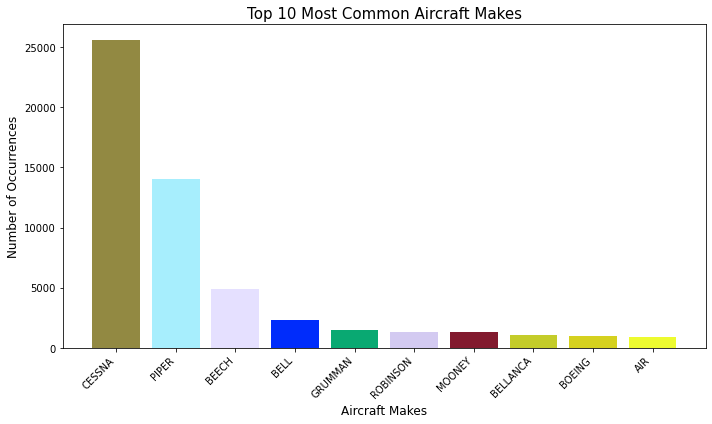

In [142]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Random Colors to use in plotting
colors = np.random.rand(len(top_10_makes_list), 3)

# Create the bar plot
ax.bar(top_10_makes_list,top_10_makes, color=colors)

# Add labels and title
ax.set_xlabel('Aircraft Makes', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_title('Top 10 Most Common Aircraft Makes', fontsize=15)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
fig.tight_layout()

# Show the plot
plt.show()

**Observation**
* The top 10 most common aircraft makes involved in accidents are: Cessna, Piper, Beech, Bell, Grumman, Robinson, Mooney, Bellanca, Boeing and Air


**Total Injuries by Make**

In [143]:
# Grouping dataframe by Make and summing the Total injuries in the grouped data
injuries_by_make = filtered_Aviation_data_df.groupby('Make')['Total.Injuries'].sum()

# Filter the df to inlcude only the aircraft makes present in top_10_makes_list
filtered_injuries = injuries_by_make[top_10_makes_list].sort_values()

# Print the filtered dataframe
filtered_injuries


Make
AIR           332.0
BELLANCA      686.0
ROBINSON      749.0
GRUMMAN       766.0
MOONEY       1089.0
BELL         2022.0
BOEING       2787.0
BEECH        4513.0
PIPER       10574.0
CESSNA      15746.0
Name: Total.Injuries, dtype: float64

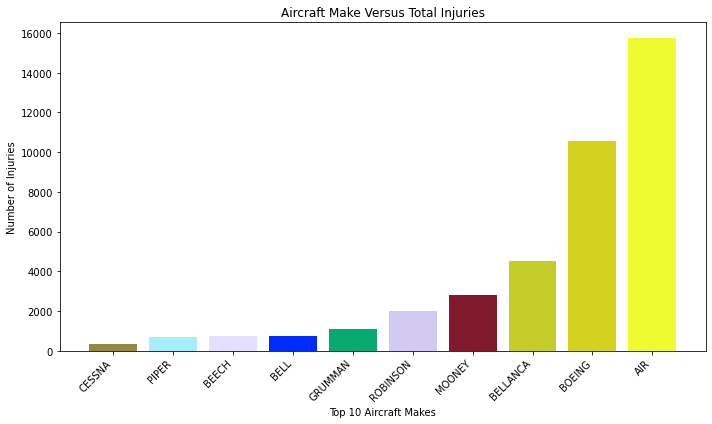

In [144]:
# Plotting Aircraft make and their injuries
# Plot the figure
fig, ax=plt.subplots(figsize=(10,6))

# Bar plot
ax.bar(top_10_makes_list,filtered_injuries, color=colors)

# Set the x-axis label and title
ax.set_xlabel('Top 10 Aircraft Makes')
ax.set_ylabel('Number of Injuries')
ax.set_title('Aircraft Make Versus Total Injuries')

# Rotating the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout
fig.tight_layout()

#Show the plot
plt.show()

**Observation**
* CESSNA has the highest number of accidents but also a high number of aircraft in operation, which could skew the perception of risk.

* GRUMMAN, ROBINSON, BELLANCA, MOONEY and AIR have lower total injuries, indicating potentially safer records.

In [145]:
# Top 5 aircraft makes with lower injuries
aircraft_makes = filtered_injuries.index.tolist()[:5]
low_injury_makes=filtered_injuries.sort_values()[0:5]
low_injury_makes
aircraft_makes

['AIR', 'BELLANCA', 'ROBINSON', 'GRUMMAN', 'MOONEY']

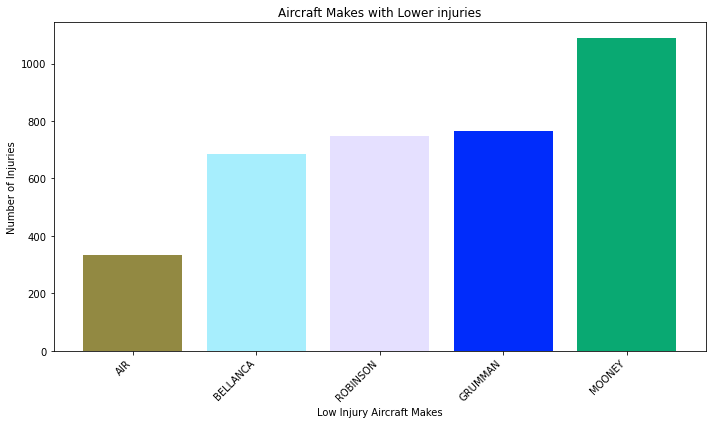

In [146]:
# Plot the figure
fig, ax=plt.subplots(figsize=(10,6))

# Bar plot
ax.bar(aircraft_makes,low_injury_makes, color=colors)

# Set the x-axis label and title
ax.set_xlabel('Low Injury Aircraft Makes')
ax.set_ylabel('Number of Injuries')
ax.set_title('Aircraft Makes with Lower injuries')

# Rotating the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout
fig.tight_layout()

#Show the plot
plt.show()

**Most Common Category**

In [147]:
Aviation_data_df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [148]:
# Top 10 categories 
top_10_categories=Aviation_data_df['Aircraft.Category'].value_counts().sort_values(ascending=False)[:10] # Selecting the 10 categories
top_10_categories_list=top_10_categories.index.to_list() # Converting the dataframe into a list
top_10_categories_list

['Airplane',
 'Helicopter',
 'Glider',
 'Balloon',
 'Gyrocraft',
 'Weight-Shift',
 'Powered Parachute',
 'Ultralight',
 'Unknown',
 'WSFT']

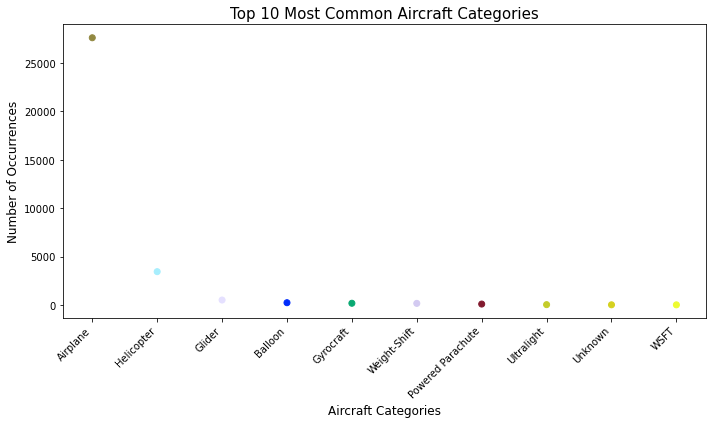

In [149]:
# Plot the figure
fig, ax=plt.subplots(figsize=(10,6))

# Plot the bar plot
ax.scatter(top_10_categories_list,top_10_categories, color=colors)

# Set labels and Title
ax.set_xlabel('Aircraft Categories', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_title('Top 10 Most Common Aircraft Categories', fontsize=15)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
fig.tight_layout()

# Show the plot
plt.show()

**Observation**
>Airplanes are the most common aircraft category involved in accidents.


In [150]:
# Aircraft Category by make

top_10_categories_make=filtered_Aviation_data_df.groupby('Make')['Aircraft.Category'].value_counts().sort_values(ascending=False)[:10] # Selecting the 10 categories
top_10_categories_make

Make      Aircraft.Category
CESSNA    Airplane             25604
PIPER     Airplane             14040
BEECH     Airplane              4892
BELL      Airplane              1585
GRUMMAN   Airplane              1474
MOONEY    Airplane              1320
BELLANCA  Airplane              1038
BOEING    Airplane               989
AIR       Airplane               910
ROBINSON  Helicopter             739
Name: Aircraft.Category, dtype: int64

Text(0.5, 1.0, 'Top 10 Aircraft Categories by Make')

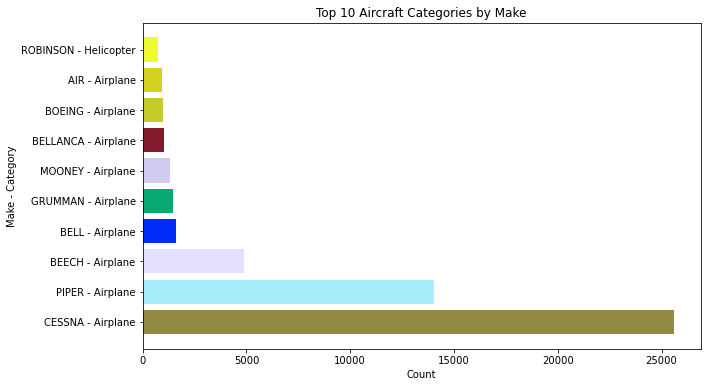

In [151]:
top_10_categories_make_df=pd.DataFrame(top_10_categories_make)
# Extracting 'Make' and 'Aircraft Category' from the MultiIndex for labeling
makes_categories = [f'{make} - {category}' for make, category in top_10_categories_make.index]

# Plotting
plt.figure(figsize=(10,6))

# Horizontal Bar Plot
plt.barh(makes_categories, top_10_categories_make.values, color=colors)

# Set labels and Title
plt.xlabel('Count')
plt.ylabel('Make - Category')
plt.title('Top 10 Aircraft Categories by Make')

**Observation**
* Within the top makes, ROBINSON is notable for being primarily associated with Helicopters.

In [152]:
# Top 

**Injuries and Aircraft Category**

In [153]:
category_injuries=filtered_Aviation_data_df.groupby(['Make', 'Aircraft.Category'])['Total.Injuries'].sum().sort_values(ascending=False)[:10]
category_injuries

Make      Aircraft.Category
CESSNA    Airplane             15746.0
PIPER     Airplane             10574.0
BEECH     Airplane              4513.0
BOEING    Airplane              2785.0
BELL      Airplane              1470.0
MOONEY    Airplane              1089.0
GRUMMAN   Airplane               766.0
BELLANCA  Airplane               686.0
BELL      Helicopter             552.0
ROBINSON  Helicopter             478.0
Name: Total.Injuries, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

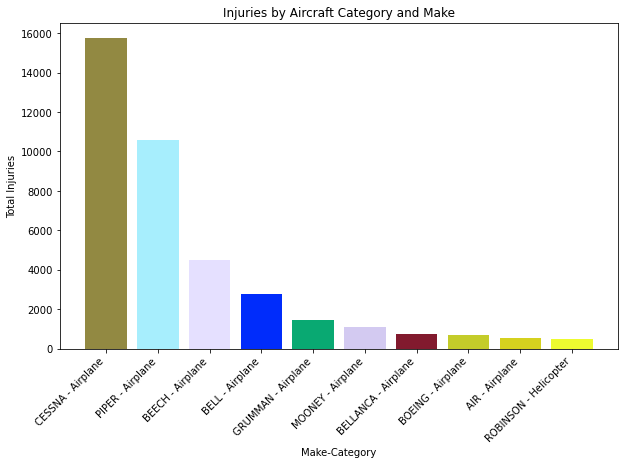

In [154]:
# Plotting
plt.figure(figsize=(10,6))

# Horizontal Bar Plot
plt.bar(makes_categories, category_injuries, color=colors)

# Set labels and Title
plt.xlabel('Make-Category')
plt.ylabel('Total Injuries')
plt.title('Injuries by Aircraft Category and Make')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

**Aircraft Damage**

In [155]:
# Aircraft Damage by make
aircraft_damage= filtered_Aviation_data_df.groupby(['Make','Aircraft.damage']).size().unstack(fill_value=0)
aircraft_damage

# Filter the df to inlcude only the aircraft makes present in top_10_makes_list
filtered_damage = aircraft_damage.loc[top_10_makes_list]

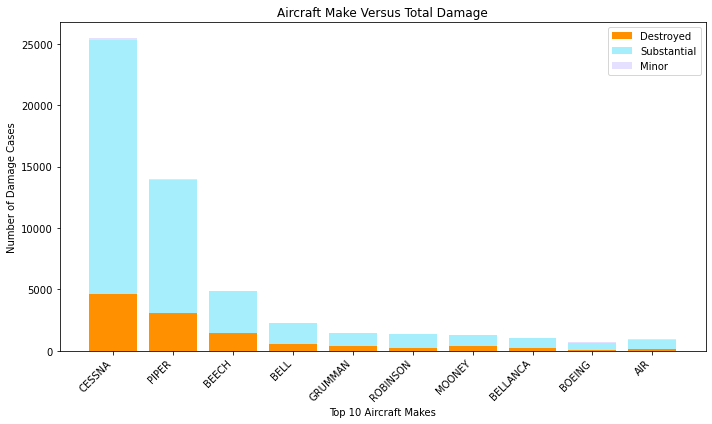

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each damage category as a stacked bar
ax.bar(top_10_makes_list, filtered_damage['Destroyed'], label='Destroyed', color='#FF9100')
ax.bar(top_10_makes_list, filtered_damage['Substantial'], bottom=filtered_damage['Destroyed'], label='Substantial', color=colors[1])
ax.bar(top_10_makes_list, filtered_damage['Minor'],
       bottom=filtered_damage['Destroyed'] + filtered_damage['Substantial'], label='Minor', color=colors[2])

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('Top 10 Aircraft Makes')
ax.set_ylabel('Number of Damage Cases')
ax.set_title('Aircraft Make Versus Total Damage')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add a legend to distinguish the damage types
ax.legend()

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

**Observation**
> All aircrafts makes underwent substantial damage after the accident

## Causes of Aviation Accidents.
We will consider:
* Weather condition
* Amateur Built
* Purpose of the flight


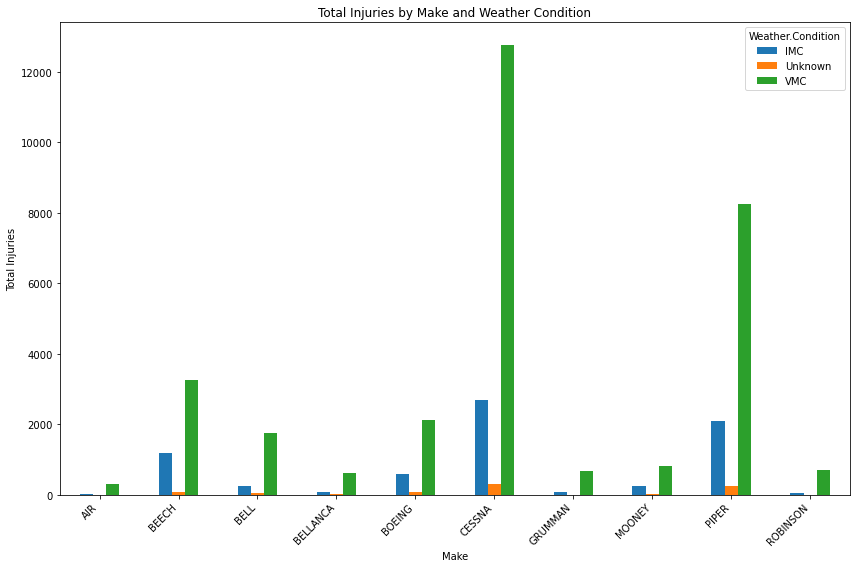

In [157]:
# Filtering the top 10 makes from the original dataframe
filtered_df = filtered_Aviation_data_df[filtered_Aviation_data_df['Make'].isin(top_10_makes_list)]

# injuries by make and weather condition
weather_injury= filtered_df.groupby(['Make', 'Weather.Condition'])['Total.Injuries'].sum().unstack()

# Plot the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each make's injuries by weather condition
weather_injury.plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel('Make')
ax.set_ylabel('Total Injuries')
ax.set_title('Total Injuries by Make and Weather Condition')

# Rotating the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

**Observation**
>A majority of accidents occur under Visual Meteorological Conditions (VMC) rather than Instrument Meteorological Conditions (IMC) or Unknown conditions.
>Injuries sustained during VMC are significantly higher across all top aircraft makes.
>CESSNA and PIPER have higher injuries under VMC, suggesting other factors like human error or mechanical issues.

In [158]:
# Amateur Built
# Injuries by make andAmateur Built
Amateur_injuries=filtered_Aviation_data_df.groupby(['Make','Amateur.Built'])['Total.Injuries'].sum().unstack()
Amateur_injuries



Amateur.Built,No,Yes
Make,,
AIR,314.0,18.0
BEECH,4492.0,21.0
BELL,1999.0,23.0
BELLANCA,685.0,1.0
BOEING,2786.0,1.0
CESSNA,15674.0,72.0
GRUMMAN,763.0,3.0
MOONEY,1083.0,6.0
PIPER,10543.0,31.0


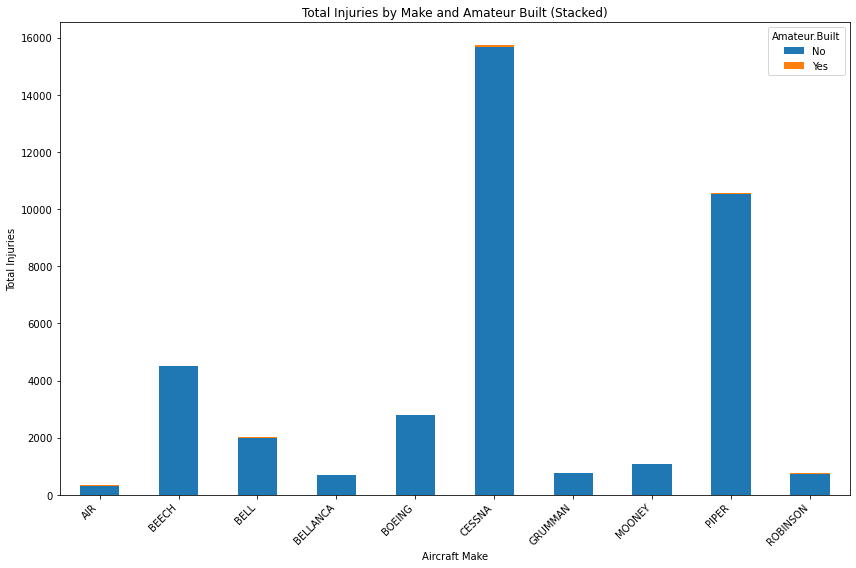

In [159]:
# Plot the stacked bar chart
Amateur_injuries.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set title and labels
plt.title('Total Injuries by Make and Amateur Built (Stacked)')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

**Observation**
> The majority of accidents involved professionally manufactured aircrafts, given they are more common, but Amateur Built aircraft may have higher risk due to variability in construction quality

In [160]:
# Purpose of the flight

# Injuries by make and purpose of flight
purpose_injuries=filtered_Aviation_data_df.groupby(['Make','Purpose.of.flight'])['Total.Injuries'].sum().unstack()
purpose_injuries


Purpose.of.flight,ASHO,Aerial Observation,Air Drop,Air Race show,Executive/corporate,Ferry,Firefighting,Flight Test,Glider Tow,Instructional,PUBS,Personal,Positioning,Public,Public Aircraft,Skydiving,Unknown
Make,,,,,,,,,,,,,,,,,
AIR,NaN,255.0,NaN,NaN,4.0,1.0,4.0,2.0,NaN,6.0,NaN,41.0,10.0,NaN,3.0,NaN,6.0
BEECH,NaN,3.0,NaN,NaN,552.0,42.0,2.0,4.0,NaN,300.0,NaN,3086.0,66.0,NaN,42.0,15.0,401.0
BELL,6.0,329.0,0.0,NaN,175.0,39.0,5.0,6.0,0.0,64.0,NaN,324.0,112.0,0.0,212.0,NaN,750.0
BELLANCA,NaN,15.0,NaN,NaN,51.0,3.0,NaN,NaN,5.0,66.0,NaN,496.0,2.0,NaN,8.0,NaN,40.0
BOEING,6.0,12.0,NaN,4.0,8.0,4.0,NaN,2.0,NaN,3.0,NaN,827.0,4.0,NaN,5.0,0.0,1912.0
CESSNA,1.0,432.0,0.0,2.0,1180.0,110.0,1.0,11.0,14.0,1698.0,1.0,10576.0,177.0,NaN,99.0,85.0,1359.0
GRUMMAN,NaN,218.0,NaN,1.0,38.0,4.0,NaN,1.0,0.0,43.0,NaN,402.0,7.0,NaN,6.0,NaN,46.0
MOONEY,NaN,2.0,NaN,NaN,84.0,5.0,NaN,1.0,NaN,32.0,NaN,948.0,6.0,NaN,2.0,NaN,9.0
PIPER,NaN,231.0,0.0,0.0,807.0,66.0,NaN,10.0,36.0,830.0,0.0,7716.0,67.0,NaN,40.0,NaN,771.0


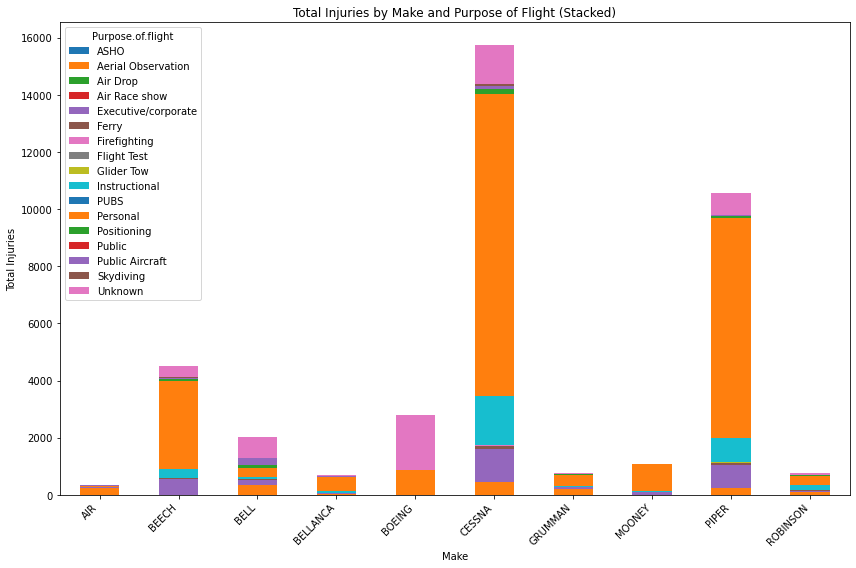

In [161]:
# Plot the stacked bar chart
purpose_injuries.plot(kind='bar', stacked=True, figsize=(12, 8))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title and labels
plt.title('Total Injuries by Make and Purpose of Flight (Stacked)')
plt.xlabel('Make')
plt.ylabel('Total Injuries')

# Show the plot
plt.tight_layout()
plt.show()

**Observation**
>The most common purpose at the time of accidents is Personal flights.
>Instructional flights also show a significant number of accidents, highlighting the risks during training.

### Regions associated with higher risks
* Which regions have high number of injuries?

In [162]:
filtered_states= Aviation_data[Aviation_data['State'].isin(States_df['Abbreviation'])]
filtered_states.shape

(79800, 20)

In [163]:
# Group data by region
# Group by 'State' and sum the 'Total Injuries'
injuries_by_state =filtered_states.groupby('State')['Total.Injuries'].sum()

# Sort the results and select the top 10
sorted_injuries_by_state = injuries_by_state.sort_values(ascending=False).head(10)
sorted_injuries_by_state


State
CA    7360.0
TX    4353.0
FL    4017.0
AK    3108.0
NY    2055.0
AZ    2048.0
CO    1999.0
WA    1672.0
PA    1601.0
MI    1579.0
Name: Total.Injuries, dtype: float64

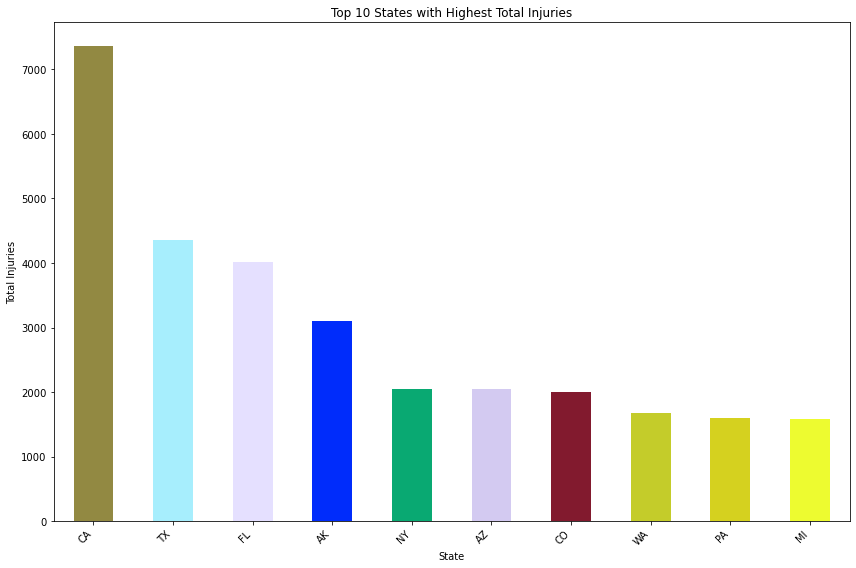

In [164]:
# Plot the total injuries by state
fig, ax = plt.subplots(figsize=(12, 8))

# Plot
sorted_injuries_by_state.head(10).plot(kind='bar', ax=ax, color=colors)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Total Injuries')
ax.set_title('Top 10 States with Highest Total Injuries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

**Observation**
* The States of California(CA), Texas(TX)  and Florida(FL) have the highest number of fatalities while Washington(WA) has the lowest injuries/fatalities

In [165]:
cleaned_data=filtered_Aviation_data_df.to_excel('Cleaned_Aviation_Data.xlsx', index=False)